In [200]:
import numpy as np
from PIL import Image
import os
from sklearn.metrics import classification_report

def addArray(ar1, ar2, sign=1):
    result = []
    # init the summation with 0s
    if len(ar1) == 0:
        for i in range(len(ar2)):
            ar1.append(0)
    
    for i in range(len(ar1)):
        print(ar1[i], ar2[i])
        result.append(ar1[i] + sign*ar2[i])

    return result

def addMat(mat1, mat2, sign=1):
    resMatrix = []
    if (len(mat1) != len(mat2)) | (len(mat1[0])!= len(mat2[0])):
        print('the two matrices are not suitable for addition (size is not the same)')
        return
    for i in range(len(mat1)):
        resrow = []
        for j in range(len(mat1[0])):
            resrow.append(mat1[i][j] + sign*mat2[i][j])
        resMatrix.append(resrow)
    return resMatrix

def arraymultdot(ar1, ar2):
    result = 0
    for i in range(len(ar1)):
        result +=(ar1[i] * ar2[i])
    return result

def column(matrix, i):
    return [row[i] for row in matrix]

def matmult(mat1, mat2):
    n = len(mat1)
    m = len(mat1[0])
    l = len(mat2[0])
    z = len(mat2)

    if(z != m):
        print('Dimensions is not suitable for multiplication', n,m,z,l)
        return
    
    resMatrix = []
    for i in range(n):
        resMatrix.append([])
    # i-> row in mat1, j->col in mat2
    for i in range(n):
        for j in range(l):
            cellres = arraymultdot(mat1[i], column(mat2, j))
            resMatrix[i].append(cellres)
    return resMatrix

def transpose(mat):
    n = len(mat)
    m = len(mat[0])
    resMatrix = []
    for i in range(m):
        resMatrix.append(column(mat, i))
    return resMatrix

def fill0(dimensions):
    resMat = []
    for i in range(dimensions):
        row0 = []
        for j in range(dimensions):
            row0.append(0)
        resMat.append(row0)
    return resMat

def divideArrayConstant(ar, constant):
    returnar = []
    for e in ar:
        returnar.append(e/constant)
    return returnar

def multMatConstant(mat, constant):
    resmat = []
    for row in mat:
        rowar = []
        for e in row:
            rowar.append(e*constant)
        rowar.append(rowar)
    return resmat

def multArrayConstant(ar, constant):
    resar = []
    for e in ar:
        resar.append(e*constant)
    return resar


The Following code used the numpy methods and the commented out code do the same thing with the functions written above.

In [201]:
trainN = 2400
testN = 200
curr = 1
currClass = 0
xTrain = []
xTest = []
yTrain = []
yTest = []
# convert Train images to 1D arrays and store them in xTrain
# create the corresponding classes
while(curr <= trainN):
    img = Image.open(os.path.join(os.getcwd(), 'Data\Train', f'{curr}.jpg'))
    arr = np.array(img)
    flatarr = arr.ravel()
    # add the current image to the training set
    xTrain.append(flatarr)
    yTrain.append(currClass)


    curr+=1
    if curr % 240 == 1:
        currClass+=1

curr = 1
currClass = 0
imgSize = xTrain[0].shape[0]

# convert test images to 1D arrays and store them in xTest
# create the corresponding classes in tests
while(curr <= testN):
    img = Image.open(os.path.join(os.getcwd(), 'Data\Test', f'{curr}.jpg'))
    arr = np.array(img)
    flatarr = arr.ravel()
    xTest.append(flatarr)
    yTest.append(currClass)
    curr+=1
    if curr%20==1:
        currClass+=1


In [202]:
# change the lists to numpy arrays to use the built-in functions of numpy
xTrain = np.array(xTrain)
xTest = np.array(xTest)
yTrain = np.array(yTrain)
yTest = np.array(yTest)

In [203]:
# save the mean1 of our class in means[class][0]
# and mean2 of the others in means[class][1] and (m2-m1) in means[class][2]
means = []

for digit in range(10):
    sumM1 = np.zeros(imgSize)
    sumM2 = np.zeros(imgSize)
    tmpMean1 = []
    tmpMean2 = []

    # for each point in my class add it to sumM1, for the others add it to sumM2
    for point in range(2400):
        if yTrain[point] == digit:
            #sumM1 = addArray(sumM1, xTrain[point], 1)
            sumM1 = np.add(sumM1, xTrain[point])
        else:
            #sumM2 = addArray(sumM2, xTrain[point], 1)
            sumM2 = np.add(sumM2, xTrain[point])

    # divide the sums by the number of points in each class
    for i in range(len(sumM1)):
        tmpMean1.append(sumM1[i]/240.0)
    for i in range(len(sumM2)):
        tmpMean2.append(sumM2[i]/2160.0)
    
    means.append([tmpMean1, tmpMean2, addArray(tmpMean2, tmpMean1, -1)])

0.3013888888888889 0.03333333333333333
0.26851851851851855 0.17916666666666667
0.2449074074074074 0.14583333333333334
0.22546296296296298 0.06666666666666667
0.29398148148148145 0.1
0.23194444444444445 0.1125
0.25462962962962965 0.1375
0.23194444444444445 0.058333333333333334
1.8532407407407407 1.7375
2.1828703703703702 2.325
2.040277777777778 2.254166666666667
2.0689814814814813 2.2583333333333333
1.9370370370370371 2.7583333333333333
2.2625 2.5
2.10462962962963 2.4125
1.8162037037037038 2.029166666666667
2.0208333333333335 2.2916666666666665
2.2888888888888888 2.3625
2.1675925925925927 2.566666666666667
2.39537037037037 2.7083333333333335
2.1958333333333333 2.7083333333333335
2.283333333333333 2.779166666666667
2.3601851851851854 2.65
1.989814814814815 2.5125
0.1398148148148148 0.13333333333333333
0.17175925925925925 0.15833333333333333
0.1439814814814815 0.058333333333333334
0.14907407407407408 0.11666666666666667
0.25046296296296294 0.016666666666666666
0.25833333333333336 0.183333

In [204]:
means = np.array(means)
tmpMean1 = np.array(tmpMean1)
tmpMean2 = np.array(tmpMean2)


In [205]:
# get the Sw for each class
Sw = []
for digit in range(10):
    #S1 = fill0(imgSize)
    S1 = np.zeros((imgSize, imgSize))
    #S2 = fill0(imgSize)
    S2 = np.zeros((imgSize, imgSize))
    for point in range(trainN):
        # if it's my class then subtract myclass Mean from it and multiply it with it's transpose
        # S1
        if yTrain[point] == digit:
            # (point - mean)
            #diff = addArray(np.array(xTrain[i]), np.array(means[digit][0]), -1)
            diff = np.array([xTrain[i] - means[digit][0]])
            #diff = [diff]
            #diffMultTranspose = matmult(transpose(diff), diff)
            diffMultTranspose = np.matmul(diff.transpose(), diff)
            #S1 = addMat(S1, diffMultTranspose)
            S1 = S1 + diffMultTranspose
        # S2
        else:
            #diff = addArray(np.array(xTrain[i]), np.array(means[digit][1]), -1)
            diff = np.array([xTrain[i] - means[digit][1]])
            #diff = [diff]
            #diffMultTranspose = matmult(transpose(diff), diff)
            diffMultTranspose = np.matmul(diff.transpose(), diff)
            #S2 =addMat(S2, diffMultTranspose)
            S2 = S2 + diffMultTranspose
    Sw.append(S1+S2)

In [206]:
Sw[0].shape

(784, 784)

In [207]:
SwInverse = []
# calculate the inverse of Sw for each class
for digit in range(10):
    SwInverse.append(np.linalg.pinv(Sw[digit]))

In [208]:
# compute for each class : weight = SwInverse * (m2-m1)
weights = []
for digit in range(10):
    weights.append(np.matmul(SwInverse[digit], means[digit][2]))

In [209]:
tmpweights = weights.copy()


In [210]:
#restart weights
weights = tmpweights.copy()

In [211]:
# apply the weight to the Test images
# and get the class with the minimum value

# init 2d list with zeros
confusionMatrix = np.zeros((10, 10))
y_pred = []
for point in range(testN):
    minClass = -1
    minClassValue = 1000000
    actualClass = yTest[point]
    for digit in range(10):
        classValue = arraymultdot(weights[digit], xTest[point])
        if minClassValue > classValue:
            minClass = digit
            minClassValue = classValue
    y_pred.append(minClass)
    confusionMatrix[actualClass][minClass] += 1

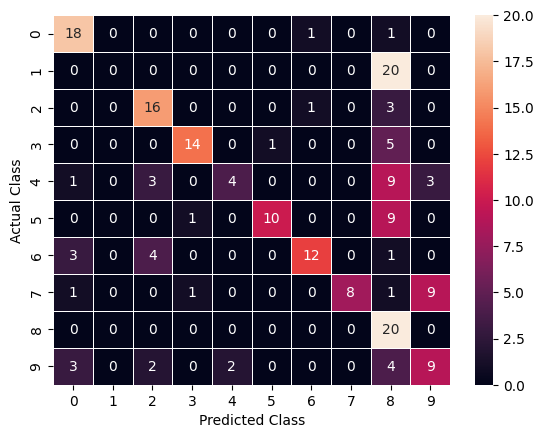

In [212]:
# plot confusion-matrix heatmap
import seaborn as sns
import matplotlib.pylab as plt
ax = sns.heatmap(confusionMatrix, linewidth=0.5, annot=True)
ax.set(xlabel='Predicted Class')
ax.set(ylabel='Actual Class')
plt.savefig('ConfusionNoBias.jpg')

In [213]:
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        20
           1       0.00      0.00      0.00        20
           2       0.64      0.80      0.71        20
           3       0.88      0.70      0.78        20
           4       0.67      0.20      0.31        20
           5       0.91      0.50      0.65        20
           6       0.86      0.60      0.71        20
           7       1.00      0.40      0.57        20
           8       0.27      1.00      0.43        20
           9       0.43      0.45      0.44        20

    accuracy                           0.56       200
   macro avg       0.63      0.55      0.54       200
weighted avg       0.63      0.56      0.54       200



c:\Users\saryn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\saryn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\saryn\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The weights without bias is very biased towards number 8,9 and the total accuracy is 0.56 which is very low accuracy.

In [214]:
# Calculating the bias term as the Wtranspose*(mean of the 2 means)
for digit in range(10):
    #meanOfMeans = addArray(means[digit][0], means[digit][1])
    meanOfMeans = np.array([means[digit][0] + means[digit][1]])
    # meanOfMeans = divideArrayConstant(meanOfMeans, 2.0)
    meanOfMeans = meanOfMeans / 2.0
    meanOfMeans = meanOfMeans.transpose()
    #meanOfMeans = [meanOfMeans]
    #negWeightTranspose = transpose([multArrayConstant(weights[digit], -1)])
    negWeightTranspose = np.array([np.array(weights[digit]) * -1])
    #W0.append(matmult(negWeightTranspose, meanOfMeans))
    W0=(np.dot(negWeightTranspose, meanOfMeans)[0][0])
    weights[digit] = np.append(weights[digit],W0)

In [215]:
# test set with the bias term
confusionMatrix = np.zeros((10,10))
y_pred = []
xTestTelda = np.zeros((testN, imgSize+1))

for point in range(testN):
    minClass = -1
    minClassValue = 1000000
    actualClass = yTest[point]
    xTestTelda[point] = np.append(xTest[point], 1)
    for digit in range(10):
        classValue = np.dot(weights[digit], xTestTelda[point])
        #classValue = arraymultdot(weights[digit], xTestTelda[point])
        if minClassValue > classValue:
            minClass = digit
            minClassValue = classValue
    y_pred.append(minClass)
    confusionMatrix[actualClass][minClass] += 1

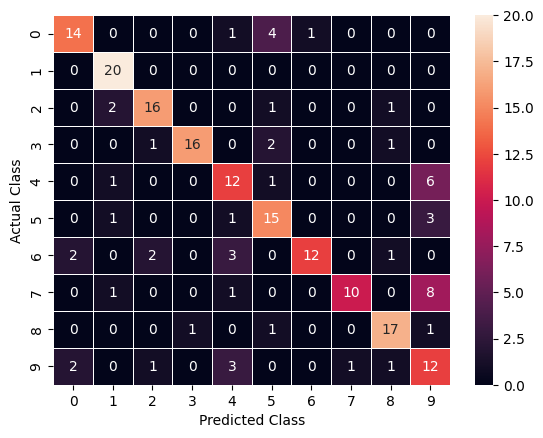

In [216]:
# plot confusion-matrix heatmap
ax = sns.heatmap(confusionMatrix, linewidth=0.5, annot=True)
ax.set(xlabel='Predicted Class')
ax.set(ylabel='Actual Class')
plt.savefig('ConfusionWithBias.jpg')

In [217]:
print(classification_report(yTest, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.80      1.00      0.89        20
           2       0.80      0.80      0.80        20
           3       0.94      0.80      0.86        20
           4       0.57      0.60      0.59        20
           5       0.62      0.75      0.68        20
           6       0.92      0.60      0.73        20
           7       0.91      0.50      0.65        20
           8       0.81      0.85      0.83        20
           9       0.40      0.60      0.48        20

    accuracy                           0.72       200
   macro avg       0.76      0.72      0.72       200
weighted avg       0.76      0.72      0.72       200



The accuracy is better with the bias from 0.56 to 0.72 , it's now not biased toward 9 and 8 and the 1 is converted from totally 0 to totally correct.